The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [26]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [27]:
nobel = pd.read_csv('data/nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [28]:
top_gender = nobel['sex'].value_counts().index[0]
print("The most commonly awarded gender is:",top_gender,"and they have won",nobel['sex'].value_counts().values[0],"awards.")

top_country = nobel['birth_country'].value_counts().index[0]

The most commonly awarded gender is: Male and they have won 905 awards.


In [29]:
print("The most commonly awarded country is:",top_country,"and it has won",nobel['birth_country'].value_counts().values[0],"awards.")

The most commonly awarded country is: United States of America and it has won 291 awards.


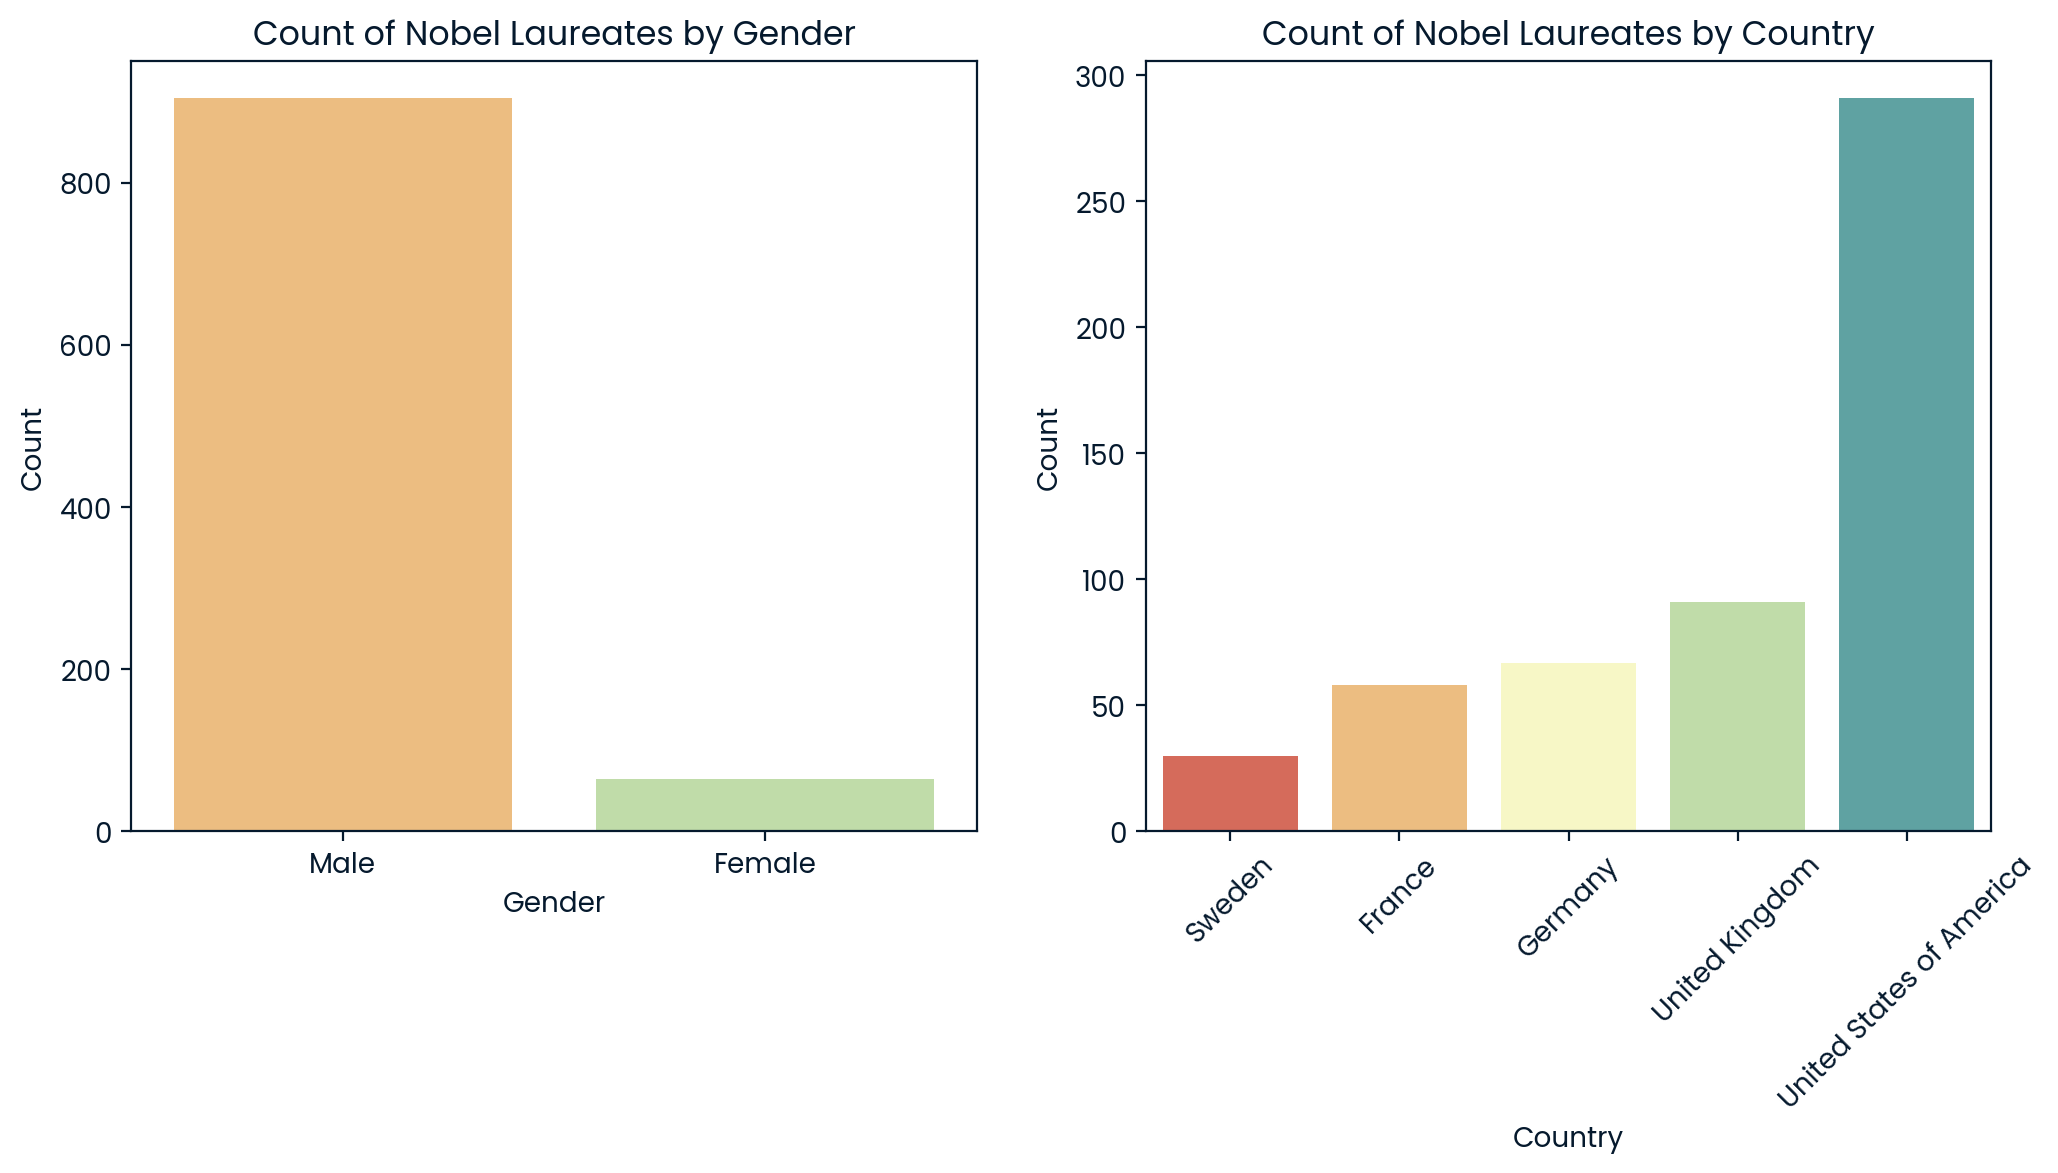

In [30]:
# Calculate counts and select top 5 countries
country_counts = nobel['birth_country'].value_counts()
top_countries = country_counts.nlargest(5).index

# Filter data for only top 5 countries
top_countries_data = nobel[nobel['birth_country'].isin(top_countries)]

# Create a figure with one row of two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for gender
sns.countplot(x="sex", data=nobel, palette='Spectral', ax=axes[0])
axes[0].set_title("Count of Nobel Laureates by Gender")
axes[0].set(xlabel="Gender", ylabel="Count")

# Countplot for top 5 countries sorted by ascending count
# Sorting the countries by their counts in ascending order
sorted_countries = top_countries_data['birth_country'].value_counts().sort_values().index
sns.countplot(x='birth_country', data=top_countries_data, palette='Spectral', ax=axes[1], order=sorted_countries)
axes[1].set_title("Count of Nobel Laureates by Country")
axes[1].set(xlabel="Country", ylabel="Count")
axes[1].set_xticklabels(sorted_countries, rotation=45)

# Display the figure
plt.show()

The graph above illustrates that since 1901 and until 2023, over 900 male have won the Nobel Prize and most of the winners are from the United States of America followed by the United Kingdom

In [31]:
decades = {
    1900: list(range(1900, 1910)),
    1910: list(range(1910, 1920)),
    1920: list(range(1920, 1930)),
    1930: list(range(1930, 1940)),
    1940: list(range(1940, 1950)),
    1950: list(range(1950, 1960)),
    1960: list(range(1960, 1970)),
    1970: list(range(1970, 1980)),
    1980: list(range(1980, 1990)),
    1990: list(range(1990, 2000)),
    2000: list(range(2000, 2010)),
    2010: list(range(2010, 2020)),
    2020: list(range(2020, 2024)),
}


def find_decade(years):
    for decade,year in decades.items():
        if years in year:
            return decade
    return "Unknown"

nobel['Decade'] = nobel['year'].apply(find_decade)

def identify_usa(country):
    if country == 'United States of America':
        return 1
    return 0

nobel['usa'] = nobel['birth_country'].apply(identify_usa)

In [32]:
num_usa_per_decade = nobel.groupby('Decade')['usa'].mean().reset_index()

In [33]:
max_decade_usa = num_usa_per_decade[num_usa_per_decade['usa']== num_usa_per_decade['usa'].max()]['Decade'].values[0]

In [34]:
print("The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories was:", max_decade_usa)

The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories was: 2000


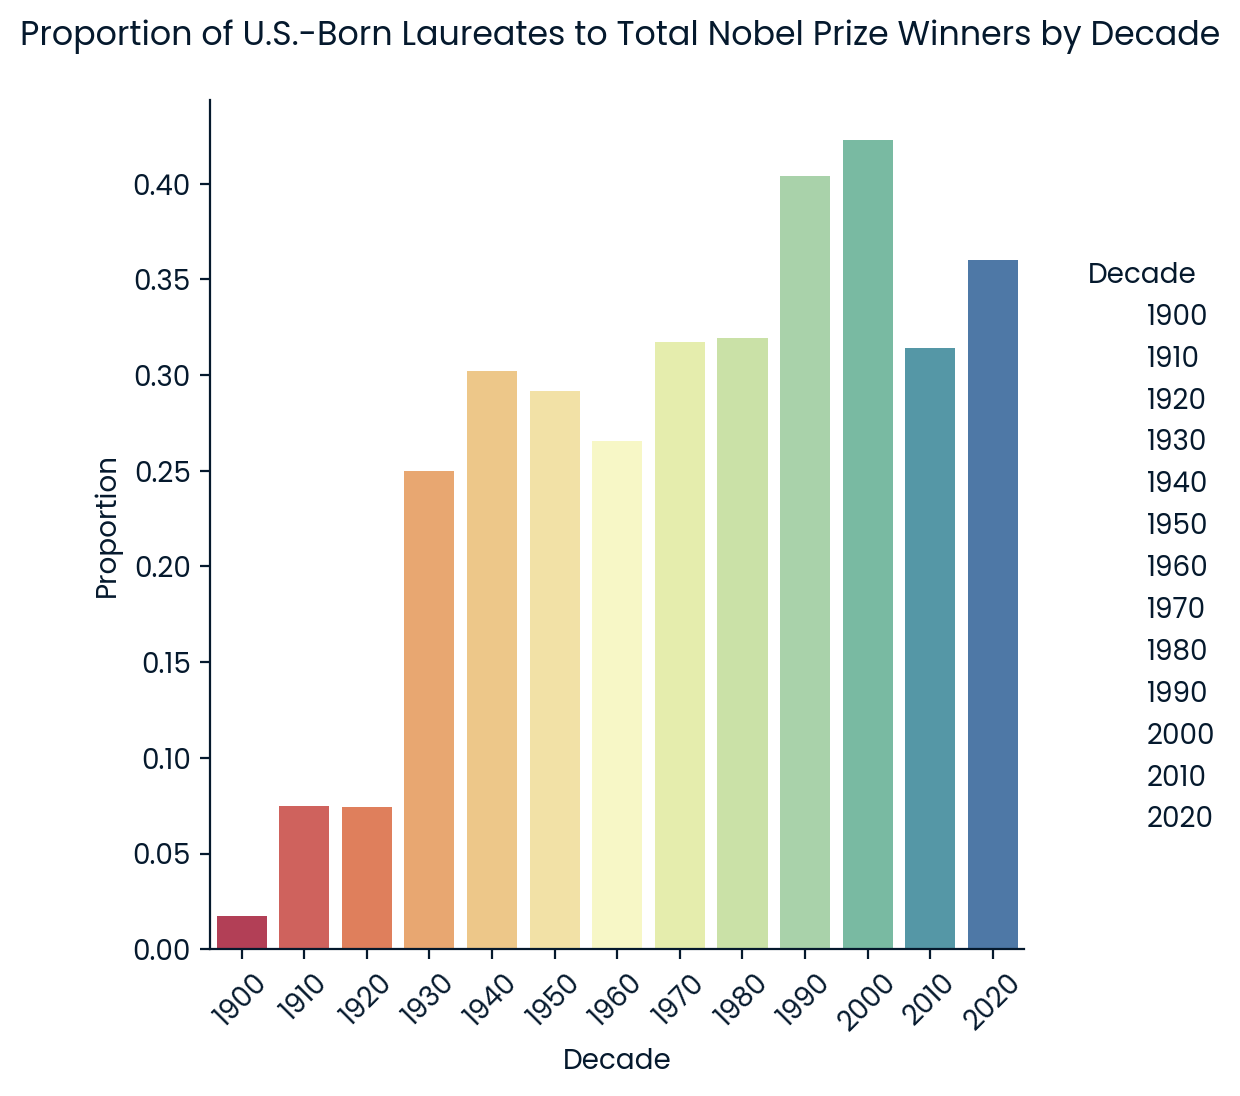

In [35]:
usa_ratio_graph = sns.catplot(x='Decade',y='usa',data=nobel,kind='bar',ci=None,palette='Spectral')
usa_ratio_graph.fig.suptitle('Proportion of U.S.-Born Laureates to Total Nobel Prize Winners by Decade',y=1.05)
usa_ratio_graph.set(xlabel= 'Decade', ylabel = 'Proportion')
plt.xticks(rotation=45)
plt.show()

Over the past century, the proportion of US born Nobel laureates were the highest in the 2000s followed by the 1990s.

In [36]:
nobel['Female'] = nobel['sex'] == 'Female'

prop_female_winners = nobel.groupby(['Decade','category'], as_index=False)['Female'].mean()
max_prop_female_winners = prop_female_winners[prop_female_winners['Female']==prop_female_winners['Female'].max()]

max_female_dict = {max_prop_female_winners['Decade'].values[0] : max_prop_female_winners['category'].values[0]}

In [37]:
print("The decade and Nobel Prize category combination that had the highest proportion of female laureates:",max_female_dict)

The decade and Nobel Prize category combination that had the highest proportion of female laureates: {2020: 'Literature'}


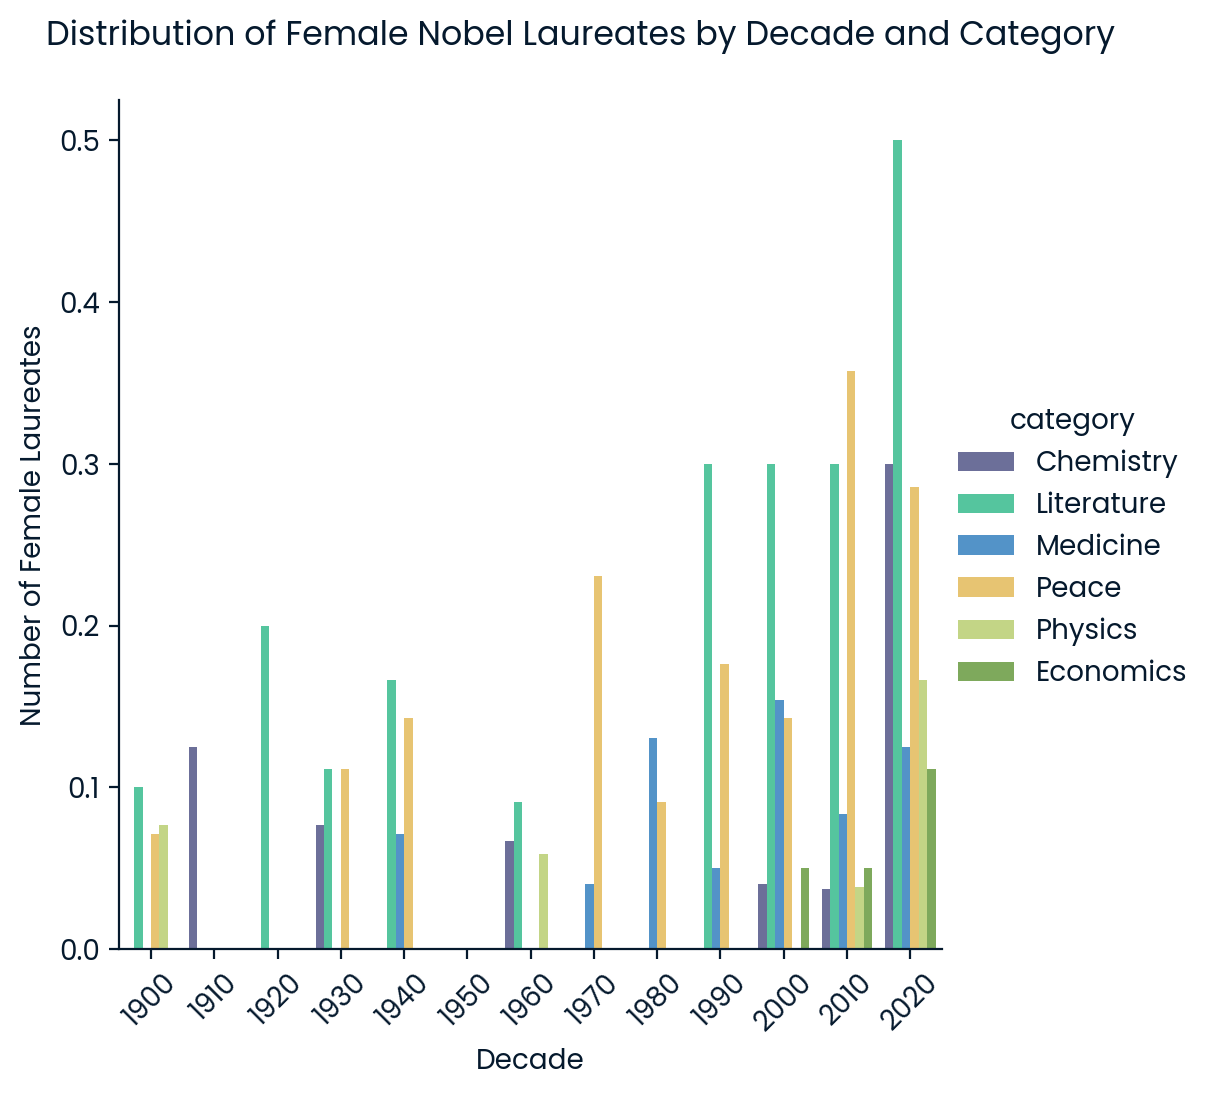

In [38]:
g = sns.catplot(x='Decade', y='Female', data=nobel, kind='bar', ci=None, hue='category')
g.fig.suptitle('Distribution of Female Nobel Laureates by Decade and Category',y=1.05)
g.set_axis_labels("Decade", "Number of Female Laureates")
plt.xticks(rotation=45)
plt.show() 


In [39]:
first_woman_year = nobel[nobel['sex'] == 'Female']['year'].iloc[0]
first_woman_name = nobel[nobel['sex'] == 'Female']['full_name'].iloc[0]
first_woman_category = nobel[nobel['sex'] == 'Female']['category'].iloc[0]

In [40]:
print('The first woman to win the Nobel Prize was',first_woman_name,"in the year",first_woman_year,"for",first_woman_category,".")

The first woman to win the Nobel Prize was Marie Curie, née Sklodowska in the year 1903 for Physics .


In [41]:
count_nl = nobel['full_name'].value_counts().reset_index().rename(columns={'index': 'Full_Name', 'full_name': 'Count'})
repeat_list = list(count_nl[count_nl['Count']>1]['Full_Name'])

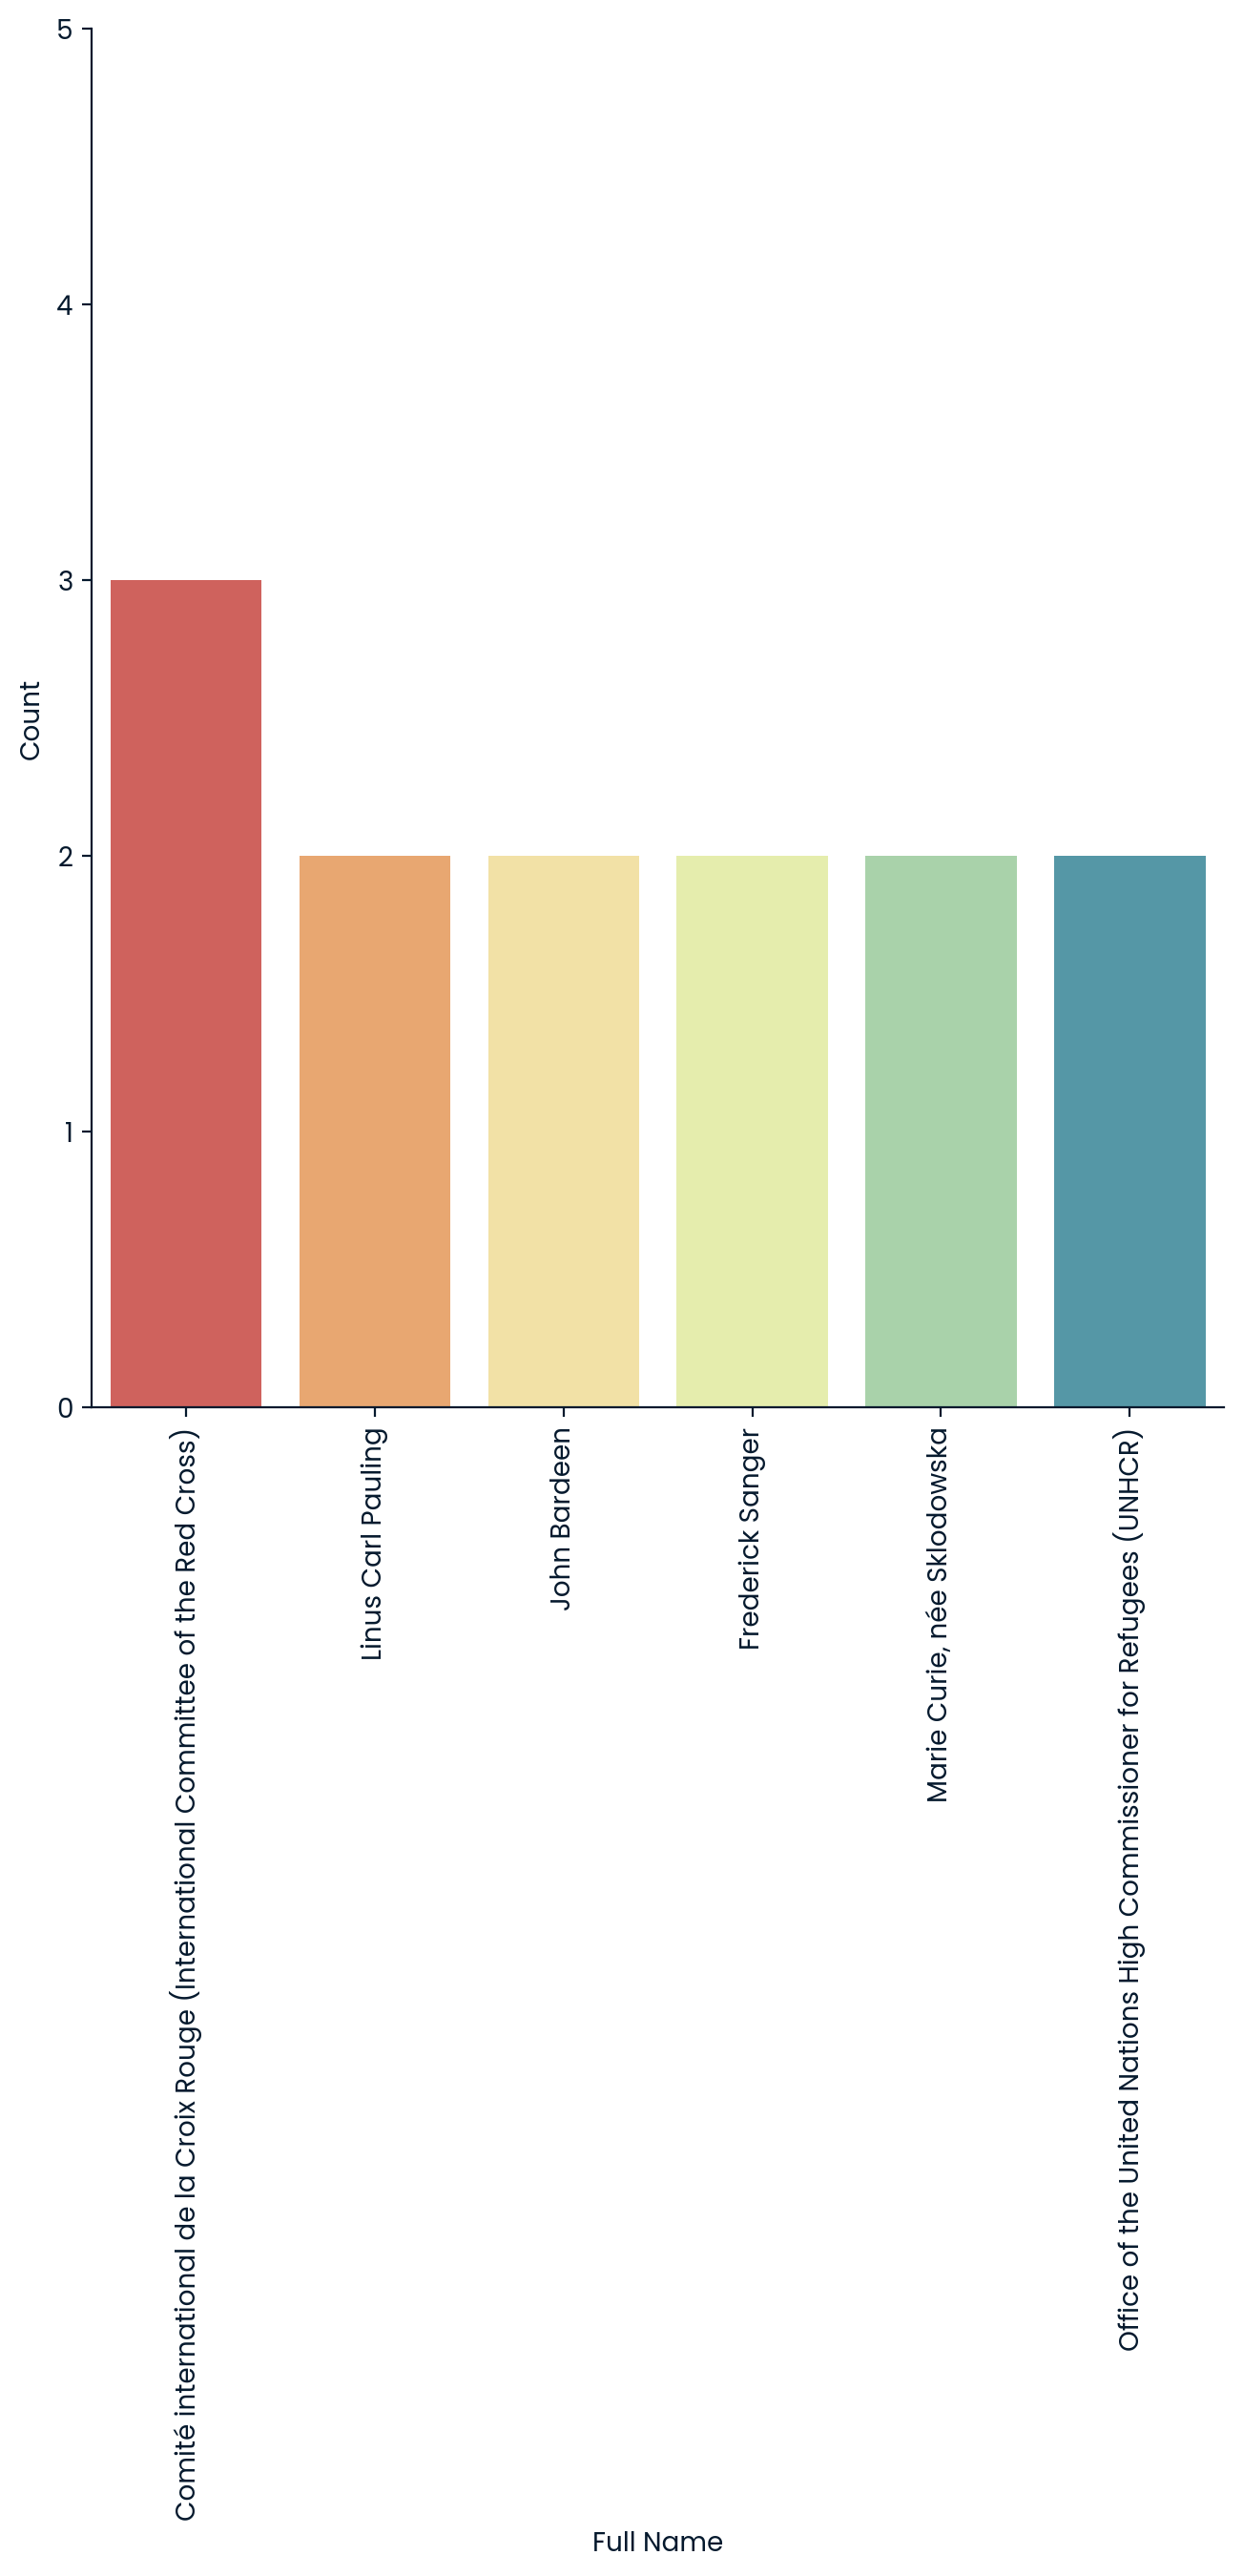

In [42]:
catplot = sns.catplot(x='Full_Name', y='Count', data=count_nl[count_nl['Count'] > 1], kind='bar', height=8, aspect=1.25,palette='Spectral',legend=None)
catplot.set_xticklabels(rotation=90)  
catplot.set(ylim=(0, 5))  
catplot.set_xlabels('Full Name') 
catplot.set_ylabels('Count')
plt.show()

In [43]:
print("The individuals or organizations have won more than one Nobel Prize throughout the years are",repeat_list)

The individuals or organizations have won more than one Nobel Prize throughout the years are ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [44]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')

nobel['birth_year'] = nobel['birth_date'].dt.year

nobel['age_at_award'] = nobel['year'] - nobel['birth_year']

In [45]:
nobel[['full_name', 'year', 'birth_year', 'age_at_award']].head()

,full_name,year,birth_year,age_at_award
0,Jacobus Henricus van 't Hoff,1901,1852.0,49.0
1,Sully Prudhomme,1901,1839.0,62.0
2,Emil Adolf von Behring,1901,1854.0,47.0
3,Jean Henry Dunant,1901,1828.0,73.0
4,Frédéric Passy,1901,1822.0,79.0


**Calculate Age at Death**

In [46]:
# Convert 'death_date' to datetime format
nobel['death_date'] = pd.to_datetime(nobel['death_date'], errors='coerce')

# Extract the death year
nobel['death_year'] = nobel['death_date'].dt.year

# Calculate age at death
nobel['age_at_death'] = nobel['death_year'] - nobel['birth_year']

# Show the results
#print(nobel[['full_name', 'birth_year', 'death_year', 'age_at_death']].head())


**Calculate Years Elapsed After Winning Before Death**

In [47]:
# Calculate the number of years after winning the Nobel until death
nobel['years_after_award_to_death'] = nobel['death_year'] - nobel['year']

# Display the results
#print(nobel[['full_name', 'year', 'death_year', 'years_after_award_to_death']].head())

**Correlation Between Age at Award and Years to Death**

In [48]:
# Calculate correlation
correlation = nobel[['age_at_award', 'years_after_award_to_death']].corr()

# Display the correlation matrix
print(correlation)

                            age_at_award  years_after_award_to_death
age_at_award                    1.000000                   -0.649454
years_after_award_to_death     -0.649454                    1.000000


**Predictive Model for Year and Age of Death**

In [49]:
correlation_matrix = nobel.select_dtypes(include=[np.number]).drop('age_at_death', axis=1).corr()

print(correlation_matrix)

high_corr = np.where((correlation_matrix > 0.8) & (correlation_matrix != 1))
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr)]
print("Highly correlated pairs:", high_corr_pairs)


                                year  ...  years_after_award_to_death
year                        1.000000  ...                   -0.151326
laureate_id                 0.665319  ...                   -0.404193
Decade                      0.996582  ...                   -0.149694
usa                         0.207944  ...                    0.080092
birth_year                  0.929989  ...                    0.143702
age_at_award                0.353053  ...                   -0.649454
death_year                  0.906780  ...                    0.279530
years_after_award_to_death -0.151326  ...                    1.000000

[8 rows x 8 columns]
Highly correlated pairs: [('year', 'Decade'), ('year', 'birth_year'), ('year', 'death_year'), ('Decade', 'year'), ('Decade', 'birth_year'), ('Decade', 'death_year'), ('birth_year', 'year'), ('birth_year', 'Decade'), ('birth_year', 'death_year'), ('death_year', 'year'), ('death_year', 'Decade'), ('death_year', 'birth_year')]


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with NaN values in the columns of interest
model_data = nobel.dropna(subset=['age_at_award', 'age_at_death'])

# Features and target
X = model_data[['age_at_award','year']]
y = model_data['age_at_death']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", rmse)

# Calculating R-squared for both training and test data
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)
print(f"R-squared for Training Data: {r_squared_train:.2f}")
print(f"R-squared for Test Data: {r_squared_test:.2f}")

# Display a sample of predictions
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual Age at Death: {actual}, Predicted Age at Death: {predicted:.2f}")


Root Mean Square Error: 10.846617810957687
R-squared for Training Data: 0.19
R-squared for Test Data: 0.20
Actual Age at Death: 68.0, Predicted Age at Death: 80.17
Actual Age at Death: 83.0, Predicted Age at Death: 81.18
Actual Age at Death: 90.0, Predicted Age at Death: 76.08
Actual Age at Death: 78.0, Predicted Age at Death: 83.67
Actual Age at Death: 62.0, Predicted Age at Death: 77.97


**Project Overview**
The goal of this project was to analyze a dataset detailing Nobel Laureates to address several key questions about the demographics and achievements of the award recipients. Utilizing Python libraries such as pandas, numpy, matplotlib, and seaborn, I performed a series of analyses to extract insights and visualize trends. The primary questions explored were:

1. Which gender and birth country are most commonly represented among Nobel Prize winners?
2. In which decade was the ratio of US-born winners to total winners the highest across all categories?
3. Which decade and category combination saw the highest proportion of female laureates?
4. Who was the first woman to win a Nobel Prize, and in what category did she win?
5. Which individuals or organizations have received multiple Nobel Prizes?

Additionally, I calculated the estimated age of laureates at the time of their award and attempted to predict their year of death. This aspect of the analysis aimed to explore my hypothesis that achieving significant milestones might impact the lifespan of these individuals, under the assumption that significant achievements could diminish life aspirations.

**Findings and Hypothesis Testing**
The analysis disproved my initial hypothesis that laureates might have a reduced desire to live after achieving a pinnacle in their careers, as suggested by the low R-squared value in the predictive modeling of their lifespan. This outcome indicates that the age at death of laureates is influenced by factors other than merely the timing of their awards, pointing to the need for a more complex model to accurately predict life expectancy.

**Conclusion**
This project not only provided valuable insights into the patterns of Nobel Prize awards but also highlighted the complexities of life expectancy post-major achievements. Future work might include a more sophisticated modeling approach, incorporating a broader set of variables to better understand the determinants of longevity among Nobel Laureates.